<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bottom-Up-Supply-Model" data-toc-modified-id="Bottom-Up-Supply-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bottom Up Supply Model</a></span><ul class="toc-item"><li><span><a href="#Simplified-Model" data-toc-modified-id="Simplified-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simplified Model</a></span></li><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functional Response</a></span><ul class="toc-item"><li><span><a href="#Mass-Specific-Functional-Response" data-toc-modified-id="Mass-Specific-Functional-Response-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Mass Specific Functional Response</a></span></li></ul></li><li><span><a href="#Loss" data-toc-modified-id="Loss-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loss</a></span></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Functional Response</a></span><ul class="toc-item"><li><span><a href="#No-Resource-Fluctuation" data-toc-modified-id="No-Resource-Fluctuation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>No Resource Fluctuation</a></span></li><li><span><a href="#Fluctuating-Resources" data-toc-modified-id="Fluctuating-Resources-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Fluctuating Resources</a></span></li><li><span><a href="#No-fluctuation-in-R(t)" data-toc-modified-id="No-fluctuation-in-R(t)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>No fluctuation in R(t)</a></span></li><li><span><a href="#Adding-Fluctuation-for-R(t)" data-toc-modified-id="Adding-Fluctuation-for-R(t)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Adding Fluctuation for R(t)</a></span><ul class="toc-item"><li><span><a href="#Different-periods-and-amplitudes" data-toc-modified-id="Different-periods-and-amplitudes-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Different periods and amplitudes</a></span></li><li><span><a href="#Constant-Period" data-toc-modified-id="Constant-Period-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>Constant Period</a></span></li></ul></li><li><span><a href="#Considerations-about-fluctuation" data-toc-modified-id="Considerations-about-fluctuation-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Considerations about fluctuation</a></span></li></ul></li><li><span><a href="#Metabolic-Cost" data-toc-modified-id="Metabolic-Cost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Metabolic Cost</a></span><ul class="toc-item"><li><span><a href="#As-proportion-on-Effective-Intake-rate" data-toc-modified-id="As-proportion-on-Effective-Intake-rate-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>As proportion on Effective Intake rate</a></span></li></ul></li></ul></li><li><span><a href="#To-do-List" data-toc-modified-id="To-do-List-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>To do List</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sandbox</a></span><ul class="toc-item"><li><span><a href="#sin-wave" data-toc-modified-id="sin-wave-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>sin wave</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#multiplot" data-toc-modified-id="multiplot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>multiplot</a></span></li></ul></li></ul></div>

This notebook is to build the model based on discussions with supervisors which is based on a more bottom up approach based on functional responses compared to traditional OGMs . 

In [1]:
## imports
import Functions as F
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}

### Mass Specific Functional Response
In order for the responses to scale with mass, mass specific parameters are needed in search rate.  

\begin{align}
    f(\cdot) &= \frac{a(m) R(t)}{1 + a(m)h(m)R(t)} \\
\end{align}

Where:
\begin{align}
    a(m) &= a_0 m^{\gamma} &= 10^{log_{10}(a0) + \gamma log_{10}(m)}\\
    h(m) &= t_{k,0} m^{-\beta} &= 10^{log_{10}(t_{k,0}) - \beta log_{10}(m)}\\
\end{align}
- $a_0$ is the mass specific search rate and changes depending on dimensionality (see pawar et al 2012). ($log_{10}(a_0) = {-3.08}$ and $\gamma = 1.05$ in 2D and $log_{10}(a_0)= {-1.77}$ and $\gamma = 0.68$in 3D)
- $t_{k,0}$ is the mass specific handling time and changes depending on dimensionality (see pawar et al 2012). ($log_{10}(t_{k,0}) = {3.95}$ and $\beta = 1.1$ in 2D and $log_{10}(t_{k,0})= {3.04}$ and $\beta = 1.02$ in 3D)

Search Rate Source (Pawar et al 2012 Main text):
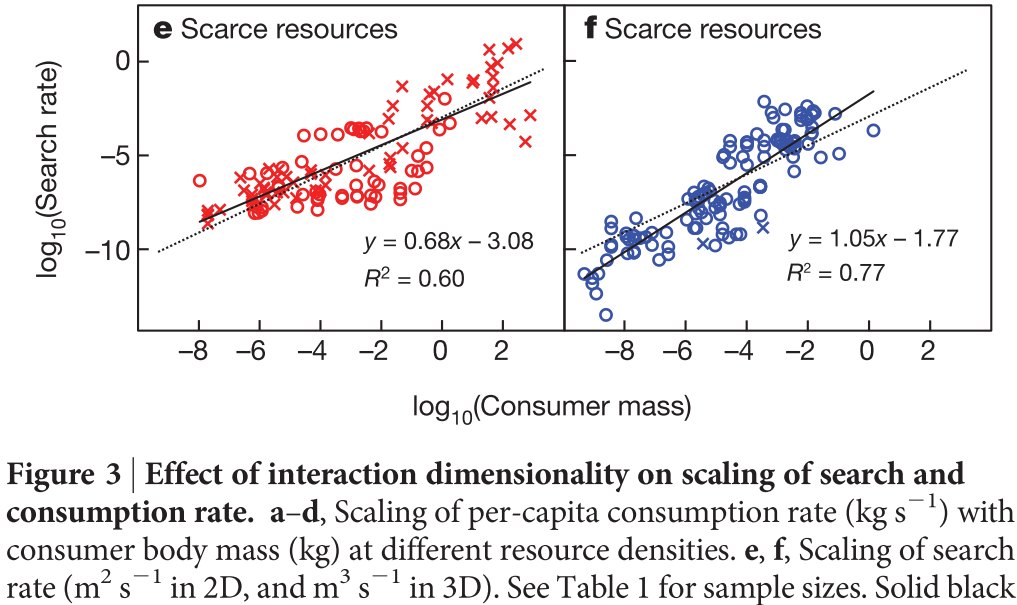

Handling Time Source (Pawar et al 2012 SI):
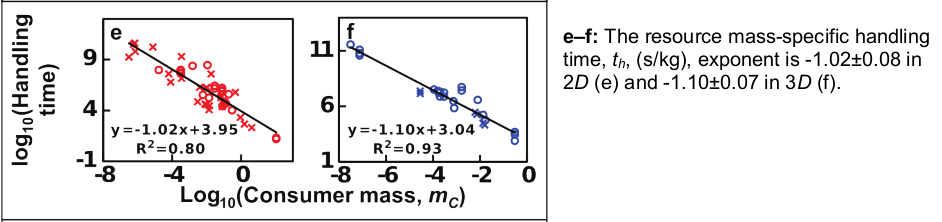


## Loss 
Metabolic loss ($L_B$) is described by the following equation:
\begin{align}
    B_m &= N_c(t)B_c \\
    B_m &\propto \frac{m(t)}{m_c} M^{-\frac{1}{4}}\\
    \text{If:   } m(t) = M , \\
    B_m &\propto \frac{MM^{-\frac{1}{4}}}{m_c} \propto \frac{M^\frac{3}{4}}{m_c}\\
    m(t) << M,\\
    B_m &\propto \frac{mM^{-\frac{1}{4}}}{m_c}\\
\end{align}

where:
- $B_m$ : Resting metabolic rate
- $N_c$ : Number of cells 
- $B_c$ : Metabolic cost of single cell
- $m(t)$ : Mass at time t
- $m_c$ : Mass of single cell
- $M$ : Assymptotic mass

# Testing
## Functional Response
### No Resource Fluctuation
test the response behaviour by plotting for constant mass and linearly increasing resource density

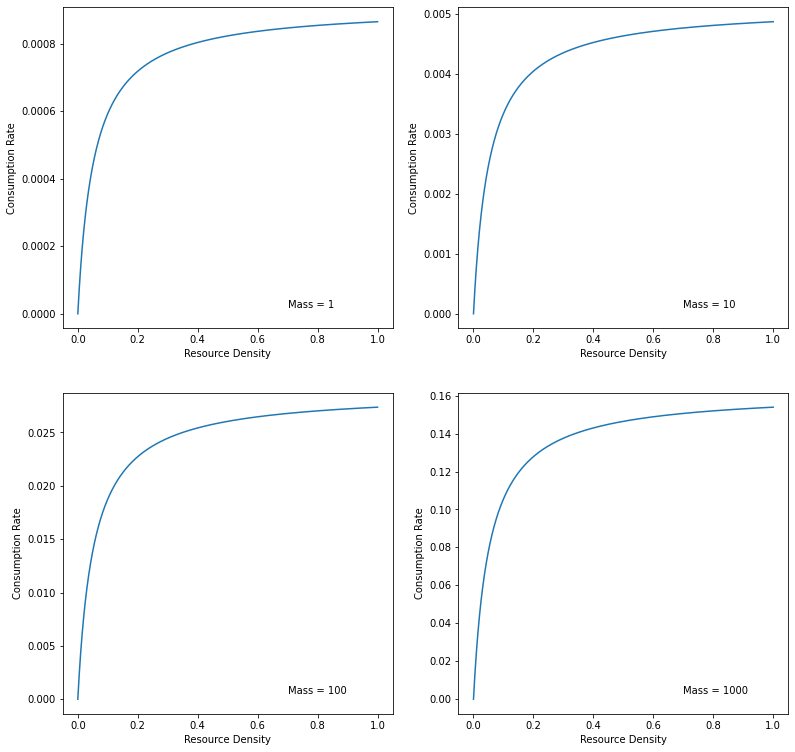

In [2]:
## parameters ##
res = 10**4 # resolution of the response
masses = [1, 10, 100, 1000]
 

plt.figure(figsize=(13,13))

for i, m in enumerate(masses, 1):
    plt.subplot(2,2, i)
    ResDens = np.linspace(0, 1, res)
    FR = F.Fun_Resp(m, ResDens, "3D")   
    plt.plot(ResDens, FR)
    plt.xlabel("Resource Density")
    plt.ylabel("Consumption Rate")
    pos = int(res * 0.7)
    plt.text(ResDens[pos], FR[10], "Mass = " + str(m))
#     plt.ylim(top = 0.0205)

plt.savefig("../results/FunctionalResponseCheck.pdf")
plt.show()


### Fluctuating Resources

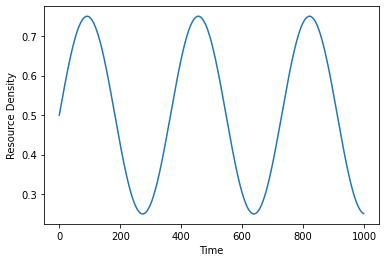

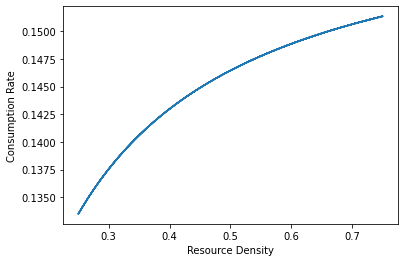

In [3]:
## parameters ##
m = 1000
average_resource_density = 0.5
t = np.arange(0, 10**3)
# fluctuates for 50% of the 
ResDens = F.Rt(t=t, amp=average_resource_density*0.5, centre=average_resource_density, period =365)
FR = F.Fun_Resp(m, ResDens, "3D")    

plt.figure()
plt.plot(t, ResDens)
plt.xlabel("Time")
plt.ylabel("Resource Density")
plt.show()

plt.figure()
plt.plot(ResDens, FR)
plt.xlabel("Resource Density")
plt.ylabel("Consumption Rate")
plt.show()


### No fluctuation in R(t)

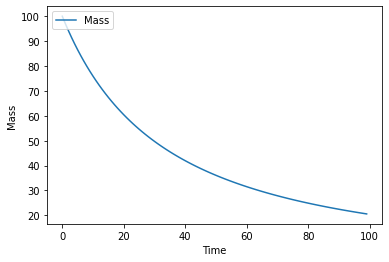

[100.          97.01696091  94.18623463  91.49695072  88.93922453
  86.50405135  84.18321212  81.96918796  79.8550923   77.83460437
  75.90191345  74.05166914  72.27893667  70.57915988  68.94812375
  67.38192459  65.87694207  64.42981439  63.03741581  61.69683663
  60.40536499  59.16047101  57.95979129  56.8011163   55.68237763
  54.60163761  53.55707885  52.54699545  51.56978461  50.62393901
  49.70804004  48.82075131  47.960813    47.12703637  46.31829917
  45.53354081  44.77175824  44.0320025   43.31337482  42.61502358
  41.93614126  41.27596163  40.63375725  40.00883698  39.40054387
  38.80825305  38.23136984  37.66932797  37.12158795  36.58763548
  36.06698008  35.55915369  35.0637094   34.58022038  34.10827874
  33.64749451  33.19749462  32.75792206  32.32843509  31.90870638
  31.4984222   31.09728187  30.70499705  30.32129106  29.94589837
  29.57856405  29.21904323  28.86710063  28.52251008  28.18505414
  27.85452363  27.53071728  27.21344137  26.90250936  26.59774158
  26.29896

In [4]:
# Parameters
params = {"alpha" : 200, "epsilon" : 0.8, "M" : 20000, "mc" : 3 * 10**-9, "B0" : 0.14, "L_R" : 0,
          "R" : 10**6, "amp" : 0, "period" : 365, "dimensionality" : "3D"}
m0 = 100
time = 10**2

mass = F.plot_supply(m0, time, params)


print(mass[:100]) 

In [5]:
resources= 10
masses = [1,10,100, 1000]
for m in masses:
    print("For mass = " + str(m))
#     print("handling : " + str(F.hm(m, "3D"))) #  search rate 
    print("search : " + str(F.am(m, "3D"))) # handling time
#     print("Func Response : " + str(F.Fun_Resp(m, resources, "3D")))
#     print("Metabolic cost : " + str(F.Bm(m, params["M"],params["mc"], params["B0"])))


For mass = 1
search : 0.016982436524617443
For mass = 10
search : 0.09549925860214359
For mass = 100
search : 0.5370317963702527
For mass = 1000
search : 3.019951720402016


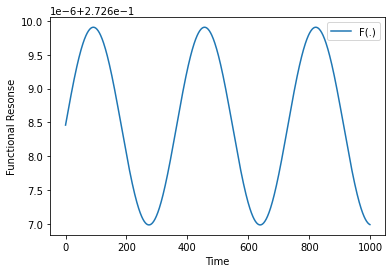

In [6]:
## checking F(.) with constant mass
import matplotlib.pyplot as plt

time = np.arange(0, 10**3,1) # 1000 days
m = 2000# growth curve 
  
# check the functional response over growth
FR = []
for t in time:
    FR.append(F.Fun_Resp(m, R = F.Rt(t, amp=1, period=365, centre=100)))
    
# FR = FR*mass
plt.figure()
plt.plot(time, FR, label="F(.)")
plt.xlabel("Time")
plt.ylabel("Functional Resonse")
plt.legend()
plt.show()



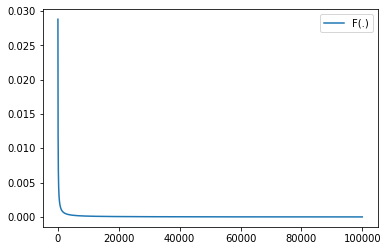

In [7]:
## checking F(.) with growth curve
import matplotlib.pyplot as plt

time = 10**5  
mass = F.dmdt_integrate(m0, time, params)# growth curve 
  
# check the functional response over growth
FR = []
for t, m in enumerate(mass):
    FR.append(F.Fun_Resp(m, R = F.Rt(t, amp=1, period=365, centre=100)))
    
# FR = FR*mass
plt.figure()
plt.plot(np.arange(0, time, 1), FR, label="F(.)")
plt.legend()
plt.show()
# print(FR)

playing with the fluctuation of R seems to only affect the growth phase

the affect also seems to be fairly minimal for even as much a 50% fluctuation

### Adding Fluctuation for R(t)
#### Different periods and amplitudes

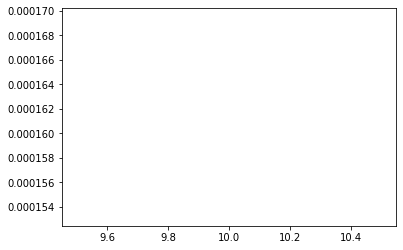

In [8]:
## looking at how the response varies for fixed size and amplitude
masses = [0.1, 1, 10, 100, 1000]# masses in g
time = np.arange(0, 10**3,1)
centre = 10 #  value to fluctuate around
amps = np.linspace(0, centre, len(masses))
# plt.figure()

# for i, m in enumerate(masses,1):
#     FR = []
#     for j, amp in enumerate(amps):
#         for t in time:
#             FR.append(F.Fun_Resp(m, F.Rt(t, amp, centre, period = 365)))
#         plt.subplot(5,5, i+j)
#         plt.plot(t, FR)
FR = []
Rt = []
for t in time:
    Rt.append(F.Rt(t, amps[0],centre, period = 365))
    FR.append(F.Fun_Resp(masses[0], Rt[t]))
    
plt.plot(Rt,FR)

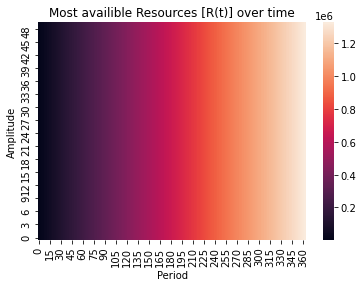

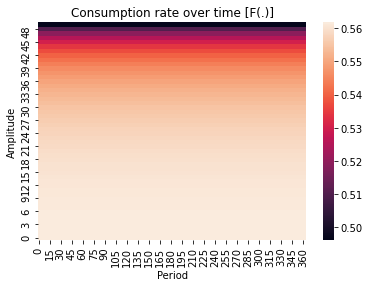

In [9]:
# heatmap of how 
import Functions as F
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.integrate import odeint as odeint
resource = 1
days = 365
period = np.arange(1, days, 1)
amp = np.linspace(0, resource, 50) # use linspace here since i dont know what the resource value looks like yet
time = np.arange(0, days*10, 1)
period, amp = np.meshgrid(period, amp)

## Resource density
R_t = np.zeros_like(amp)

for t in time:
    R_t = R_t + F.Rt(t, amp, period, resource)
    
# # plt.xlabel("")
# # sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()
sb.heatmap(R_t).invert_yaxis()
plt.title("Most availible Resources [R(t)] over time")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## functional response
FuncResp = np.zeros_like(amp)

for t in time:
    FuncResp = F.Fun_Resp(m = 0.1,  R = F.Rt(t, amp, centre = resource)) + FuncResp
    
sb.heatmap(FuncResp).invert_yaxis()
plt.title("Consumption rate over time [F(.)]")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## properly using integration 
# def FuncInt(m, t, amp, period, centre, h):
#     return F.Fun_Resp(m, F.Rt(t, amp, period, centre = resource), h)
# t = np.arange(0, 365*2, 1)
# m = 0.1
# h = 2.57
# centre = resource

# FuncRespInt = odeint(FuncInt, m, t, args=(amp, period, centre, h))


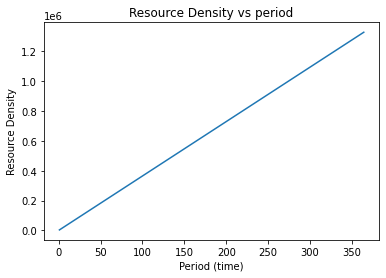

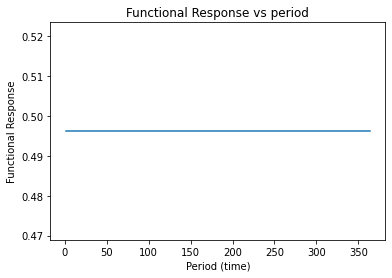

In [10]:
# looking at the resource fluctuation with period
plt.figure()
plt.plot(period[0,:], R_t[-1,:], label = "F(.)")
plt.title("Resource Density vs period")
plt.xlabel("Period (time)")
plt.ylabel("Resource Density")
plt.show()
# looking at the fucntional response fluctuation with period
plt.figure()
plt.plot(period[0,:], FuncResp[-1,:], label = "F(.)")
plt.title("Functional Response vs period")
plt.xlabel("Period (time)")
plt.ylabel("Functional Response")
plt.show()

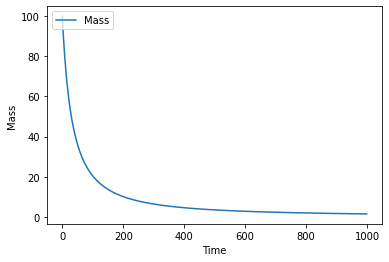

In [11]:
# params = {"epsilon" : 1, "L_B" : 10**-4.7, "L_R" : 0,  
#           "R" : 1.2*10**-3, "amp" : 0.01, "period" : 365}
time = 10**3

mass = F.plot_supply(m0, time, params)

# print(mass)

#### Constant Period

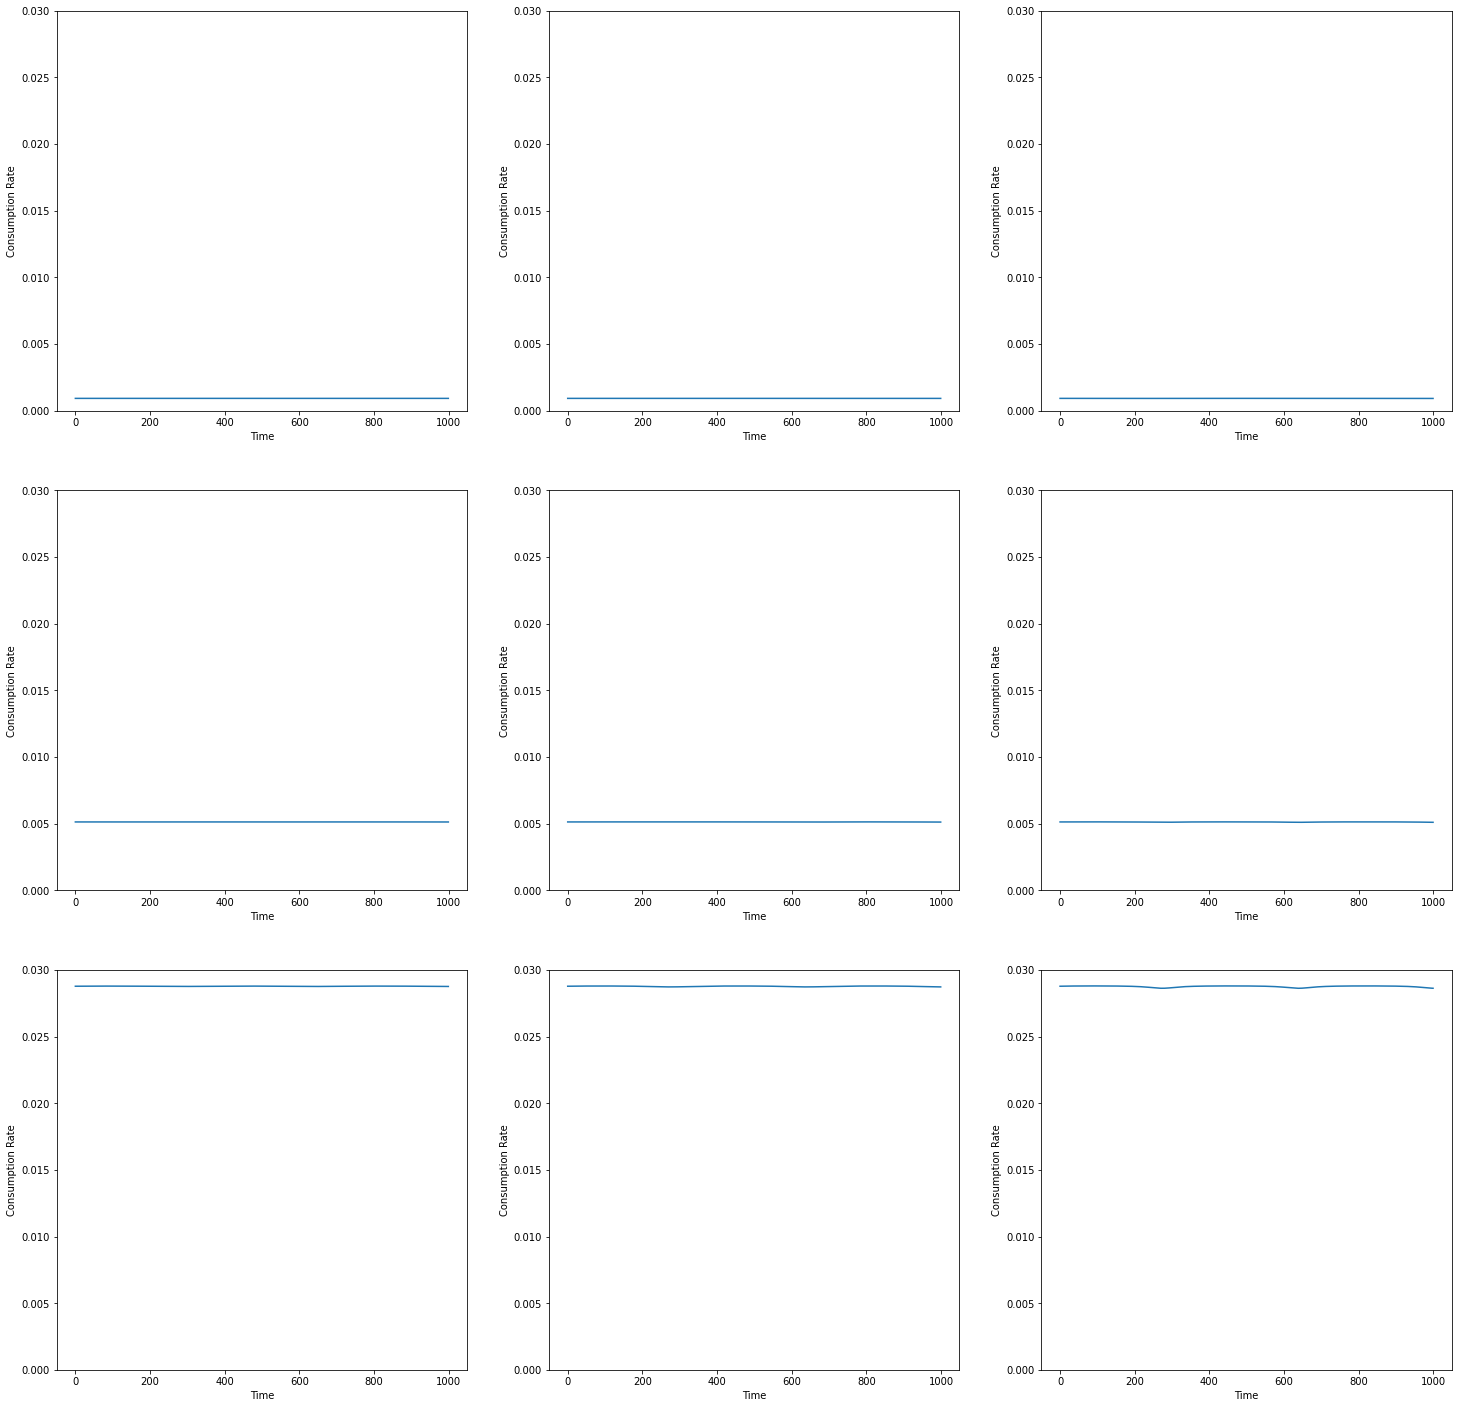

In [30]:
time = np.arange(0, 10**3, 1)
resource = 10*3
period = 365
masses = [1, 10, 100]
amps = [i*resource for i in [0.25, 0.5, 0.75]]

plt.figure(figsize=(25, 25))
ticker = 0
for m in masses:
    for amp in amps:
        ticker = ticker +1
        FR = [0] * len(time)
        
        for t in time:
            R_t = F.Rt(t, amp, resource, period)
            FR[t] = F.Fun_Resp(m, R_t, "3D") 

        plt.subplot(3,3, ticker)
#         plt.title(str(amp) +","+ str(FR))
        plt.plot(time, FR, label = str(amp) +","+ str(m))
#         plt.text(20, min(FR) - max(FR) + 0.001,"amp = " + str(amp) +","+ "mass =" + str(m))
        plt.xlabel("Time")
        plt.ylabel("Consumption Rate")
        plt.ylim(top = 0.03, bottom = 0.000)

plt.savefig("../results/AmplitudeConsumption9x9.pdf")
plt.show()

            

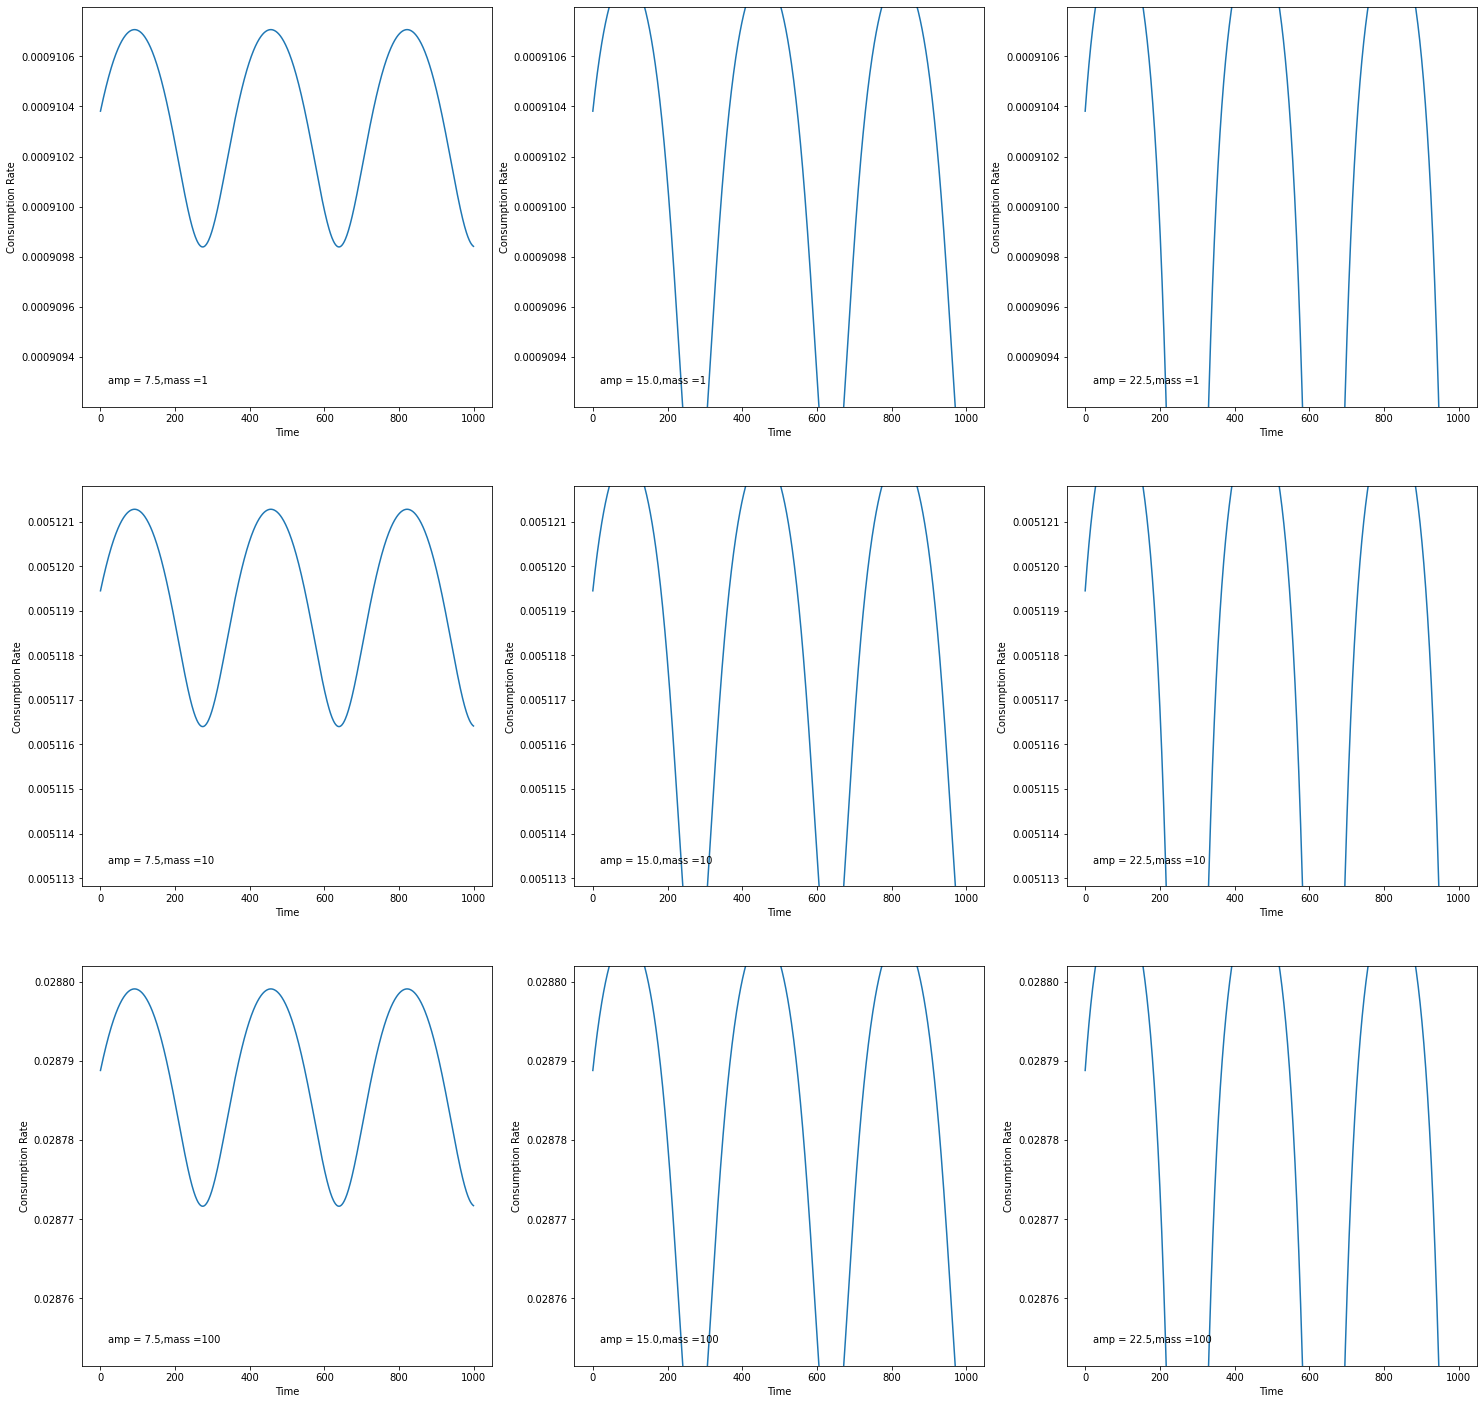

In [13]:
## same as above plot
# but with scales adjusted to be same within mass
time = np.arange(0, 10**3, 1)
resource = 10*3
period = 365
masses = [1, 10, 100]
amps = [i*resource for i in [0.25, 0.5, 0.75]]

plt.figure(figsize=(25, 25))
ticker = 0
for m in masses:
    for i, amp in enumerate(amps,1):
        ticker = ticker +1
        FR = [0] * len(time)
        
        for t in time:
            R_t = F.Rt(t, amp, resource, period)
            FR[t] = F.Fun_Resp(m, R_t, "3D") 
            
        # to get y axis limits
        if i == 1:
            ytop = max(FR) *1.0001
            ybot = min(FR) *0.9993
            text_pos = ybot + (ybot* 0.0001)
        # plot
        plt.subplot(3,3, ticker)
        plt.plot(time, FR, label = str(amp) +","+ str(m))
        plt.text(20, text_pos,"amp = " + str(amp) +","+ "mass =" + str(m))
        plt.xlabel("Time")
        plt.ylabel("Consumption Rate")
        plt.ylim(top = ytop , bottom = ybot)

plt.savefig("../results/AmplitudeConsumption9x9_byAmp.pdf")
plt.show()

            

### Considerations about fluctuation
Fluctuation appears to mainly affect the start of the growth curve and not so much once stability is reached.
So this raises the questions:
- where on the sin wave does the organism start
- 

## Metabolic Cost
### As proportion on Effective Intake rate
Effective intake rate can be considered to be proportional to Search rate
- so will take $L_B$ to be some proportion of search rate e.g. 10%

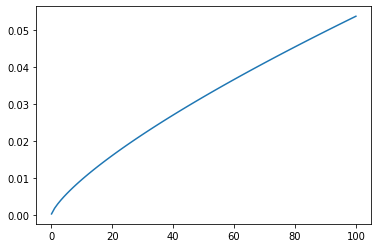

In [14]:
mass = np.linspace(0.1, 100, 100)
cost = F.Bm(mass)
plt.figure()
plt.plot(mass, cost)

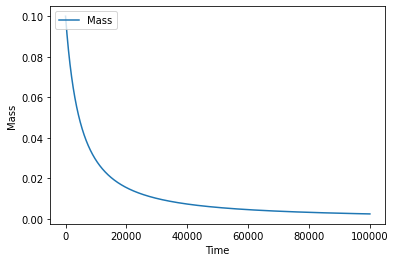

array([0.1       , 0.09997953, 0.09995908, ..., 0.00240949, 0.00240946,
       0.00240943])

In [15]:
m0 = 0.1
time = 10**5
params = {"alpha" : 200, "epsilon" : 0.6, "L_R" : 0, "R" : 10**3, 
          "amp" : 0, "period" : 365, "dimensionality" : "3D"}

F.plot_supply(m0, time, params)

# To do List

- different masses and amplitudes plot 


# Sandbox 

## sin wave

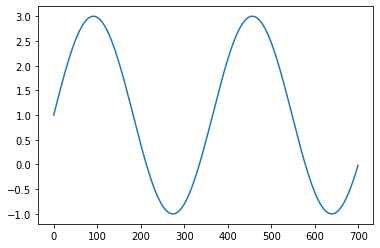

In [16]:
# testing a sin wave function
import Functions as F
import scipy as sc
import matplotlib.pyplot as plt
def Rt(t, amp, period, centre):
    """
    period is the period of the wave in days
    centre is the value the wave will oscilate around
    amp is amplitude
    t is the number of days, should essentailly reset to 1 when it is 1 day over the period
    """
    x = t * (2 * np.pi / period) 
    return amp * np.sin(x) + centre


t = np.arange(0, 700, 1)
Rts = []
for i in t:
    Rts.append(F.Rt(t=i, amp=2, period=365, centre=1))
    
plt.figure()
plt.plot(t, Rts)
plt.show()

## Heatmap

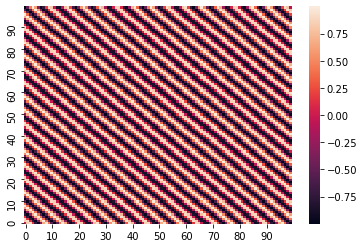

In [17]:
# heatmap testing

import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
res = 100
x = np.arange(0, res, 1)
y = np.arange(0, res, 1)

x,y = np.meshgrid(x,y)

def fun(x,y):
    return np.sin(x + y)

plt.xlabel("x")
sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()

## multiplot

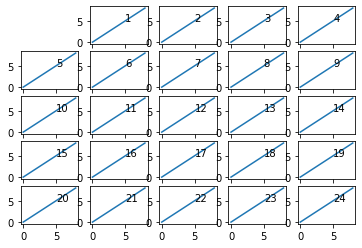

In [18]:
import matplotlib.pyplot as plt

t = np.arange(0,9,1)
m = np.arange(0, 9,1)

for i in range(1,25):
    plt.subplot(5,5,i+1)
    plt.plot(t,m)
    plt.text(5, 5, i)

In [19]:
import numpy as np
m = 0.25
beta = 1.1
a0 = 3

print(10**np.log10(a0*(m**-beta)))
a0 = 10**a0
print(a0 * (m**-beta))


13.784380259964419
4594.79341998814


In [20]:
from numpy import log10 as log10
a0 = 3
m = 35.5
exp = 0.75

answer = a0 * (m**exp)
test = log10(a0) + (exp*log10(m))
test = 10**test
print(answer)
print(test)
round(answer, 4) == round(test,4)

43.63073403265322
43.63073403265321


True